In [18]:
# 1. Reading the CSV File:
import pandas as pd

# load csv file
df = pd.read_csv('acc_players-2324F.csv', skiprows=1)


# first 5 rows
print(df.head())

   Rk         Player Class Pos          School   G   MP  TRB  AST  STL  ...  \
0   1   Amaree Abram    SO   G    Georgia Tech  10  108   17   11    1  ...   
1   2   Sola Adebisi    FR   F   Florida State   7    9    1    1    0  ...   
2   3  Prince Aligbe    SO   F  Boston College  35  651  119   21   15  ...   
3   4     Abe Atiyeh    SR   G  Boston College   4    6    0    0    0  ...   
4   5    Zack Austin    JR   F      Pittsburgh  33  746  137   29   32  ...   

   TOV  PF  PTS    FG%    2P%    3P%    FT%   PER   WS  BPM  
0    9  10   34  0.262  0.318  0.200  0.615   4.1 -0.1 -6.4  
1    1   1    2  0.500  0.500    NaN    NaN   3.5  0.0 -6.7  
2   30  51  164  0.435  0.522  0.147  0.620   9.4  0.9 -1.3  
3    1   0    3  0.333  0.000  1.000    NaN   1.1  0.0 -8.2  
4   13  35  216  0.417  0.563  0.295  0.737  18.0  2.9  7.9  

[5 rows x 21 columns]


In [22]:
# 2. Basic Analysis:

# Calculate the total points scored by all players combined.
total_points = df['PTS'].sum()
print(total_points)

# Find the player who has played the most minutes (MP).
most_minutes_player = df.loc[df['MP'].idxmax(), 'Player']
print(most_minutes_player)

# Identify the top 5 players in terms of total rebounds (TRB). 
top_5_rebounds = df[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
print(top_5_rebounds)

38411
Casey Morsell
              Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


In [23]:
# 3. Player Filtering:

# Create a new DataFrame containing only players who played more than 500 minutes.
df_filtered = df[df['MP'] > 500]
df_filtered.head()

# From this filtered DataFrame, determine the player with the highest total assists (AST).
top_assists_player = df_filtered.loc[df_filtered['AST'].idxmax(), 'Player']
print(top_assists_player)

# Who are the top 3 Assist Leads in the League?
top_3_assists = df_filtered[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print(top_3_assists)

# Who are the top 3 Shot Blockers?
top_3_blockers = df_filtered[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print(top_3_blockers)

Reece Beekman
             Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150
            Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


In [24]:
# 4. School-Based Analysis

# Group the players by School and calculate the total points scored by each school.
school_points = df.groupby('School')['PTS'].sum().sort_values(ascending=False)
print(school_points)

# Group the players by School and calculate the total assists (AST) for each team.
school_assists = df.groupby('School')['AST'].sum().sort_values(ascending=False)
print(school_assists)

# Sort the schools by total points scored and display the top 3 schools.
top_3_schools = school_points.head(3)
print(top_3_schools)

School
NC State          3101
North Carolina    3032
Duke              2830
Clemson           2785
Wake Forest       2733
Boston College    2667
Virginia Tech     2547
Florida State     2526
Pittsburgh        2495
Syracuse          2442
Miami (FL)        2424
Louisville        2304
Georgia Tech      2272
Virginia          2140
Notre Dame        2113
Name: PTS, dtype: int64
School
Duke              551
NC State          536
North Carolina    536
Clemson           533
Virginia Tech     514
Boston College    509
Virginia          509
Miami (FL)        454
Pittsburgh        452
Syracuse          442
Wake Forest       429
Georgia Tech      425
Florida State     406
Louisville        356
Notre Dame        335
Name: AST, dtype: int64
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


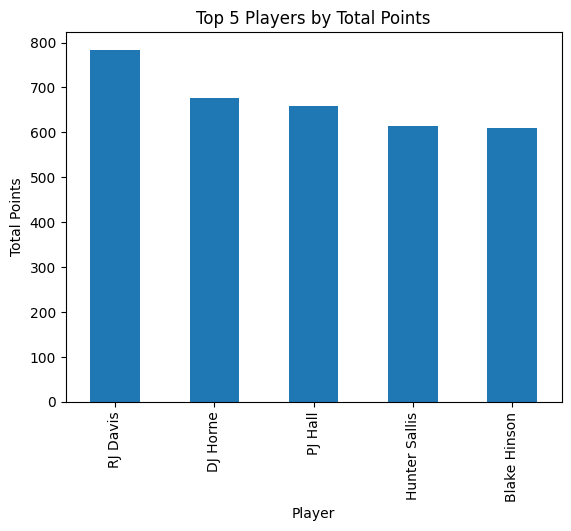

correlation coefficient: 0.42106638941997804


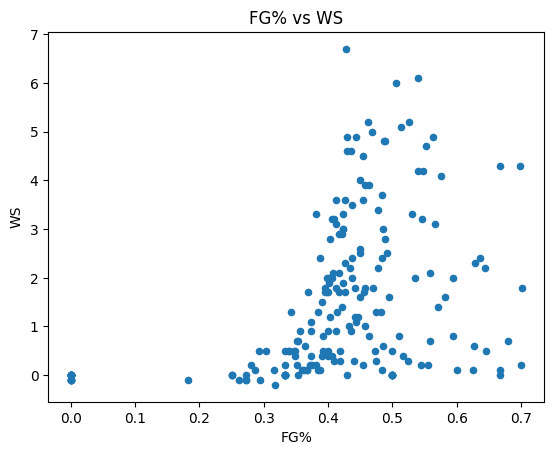

In [29]:
# 5. Extra Credit (Bonus):

# Create a bar chart showing the top 5 players by total points scored (PTS).
import matplotlib.pyplot as plt

# Top 5 players by points
top_5_points = df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

# Bar chart
top_5_points.plot(kind='bar', x='Player', y='PTS', legend=False)
plt.title('Top 5 Players by Total Points')
plt.ylabel('Total Points')
plt.show()

# Correlation: Investigate whether there is any correlation between a player's field goal percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the correlation coefficient.
df.plot(kind='scatter', x='FG%', y='WS', title='FG% vs WS')
correlation = df['FG%'].corr(df['WS'])
print("correlation coefficient:", correlation)